In [ ]:
#ai허브

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#-*- coding:utf-8 -*-
import urllib3
import json
import base64
openApiURL = "http://aiopen.etri.re.kr:8000/ObjectDetect"
accessKey = "fdf16766-d73d-48be-a4b3-c03276a6cfb2"  # 개인 인증키
imageFilePath = "/content/drive/MyDrive/data/딥러닝/cats.png"
type = "png"
 
file = open(imageFilePath, "rb")
imageContents = base64.b64encode(file.read()).decode("utf8")
file.close()
 
requestJson = {
    "access_key": accessKey,
    "argument": {
        "type": type,
        "file": imageContents
    }
}
 
http = urllib3.PoolManager()
response = http.request(
    "POST",
    openApiURL,
    headers={"Content-Type": "application/json; charset=UTF-8"},
    body=json.dumps(requestJson)
)
 
print("[responseCode] " + str(response.status))
print("[responBody]")
print(response.data)
                       

[responseCode] 200
[responBody]
b'{"result":0,"return_object":{"data":[{"class":"cat","confidence":"0.994722","x":"245","y":"78","width":"155","height":"313"},{"class":"cat","confidence":"0.994345","x":"358","y":"62","width":"113","height":"309"},{"class":"cat","confidence":"0.993692","x":"452","y":"77","width":"113","height":"308"},{"class":"cat","confidence":"0.989767","x":"30","y":"85","width":"125","height":"293"},{"class":"cat","confidence":"0.989640","x":"145","y":"83","width":"107","height":"292"}]}}'


In [3]:
x = response.data.decode()
x = eval(x)
data = x['return_object']['data']

In [4]:
data

[{'class': 'cat',
  'confidence': '0.994722',
  'height': '313',
  'width': '155',
  'x': '245',
  'y': '78'},
 {'class': 'cat',
  'confidence': '0.994345',
  'height': '309',
  'width': '113',
  'x': '358',
  'y': '62'},
 {'class': 'cat',
  'confidence': '0.993692',
  'height': '308',
  'width': '113',
  'x': '452',
  'y': '77'},
 {'class': 'cat',
  'confidence': '0.989767',
  'height': '293',
  'width': '125',
  'x': '30',
  'y': '85'},
 {'class': 'cat',
  'confidence': '0.989640',
  'height': '292',
  'width': '107',
  'x': '145',
  'y': '83'}]

In [5]:
json_data = json.loads(response.data)
data =json_data['return_object']['data']

In [6]:
data

[{'class': 'cat',
  'confidence': '0.994722',
  'height': '313',
  'width': '155',
  'x': '245',
  'y': '78'},
 {'class': 'cat',
  'confidence': '0.994345',
  'height': '309',
  'width': '113',
  'x': '358',
  'y': '62'},
 {'class': 'cat',
  'confidence': '0.993692',
  'height': '308',
  'width': '113',
  'x': '452',
  'y': '77'},
 {'class': 'cat',
  'confidence': '0.989767',
  'height': '293',
  'width': '125',
  'x': '30',
  'y': '85'},
 {'class': 'cat',
  'confidence': '0.989640',
  'height': '292',
  'width': '107',
  'x': '145',
  'y': '83'}]

In [7]:
import pandas as pd
df = pd.DataFrame(data)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   class       5 non-null      object
 1   confidence  5 non-null      object
 2   x           5 non-null      object
 3   y           5 non-null      object
 4   width       5 non-null      object
 5   height      5 non-null      object
dtypes: object(6)
memory usage: 368.0+ bytes


In [8]:
df = df.astype({'confidence':float, 'x':int, 'y':int, 'width':int, 'height':int})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   class       5 non-null      object 
 1   confidence  5 non-null      float64
 2   x           5 non-null      int64  
 3   y           5 non-null      int64  
 4   width       5 non-null      int64  
 5   height      5 non-null      int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 368.0+ bytes


In [9]:
df.head()

,class,confidence,x,y,width,height
0,cat,0.994722,245,78,155,313
1,cat,0.994345,358,62,113,309
2,cat,0.993692,452,77,113,308
3,cat,0.989767,30,85,125,293
4,cat,0.989640,145,83,107,292


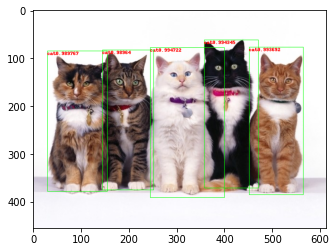

In [12]:

from PIL import Image
from PIL import ImageDraw
import numpy as np
import matplotlib.pyplot as plt

def pil_draw_rect(image, point1, point2, label):
    draw = ImageDraw.Draw(image)
    draw.rectangle((point1, point2), outline=(0, 255,0), width=1)
    draw.line
    draw.text(point1,label,fill='red')
    
    return image

image = Image.open(imageFilePath)
for i in range(len(df)):
  x = df.x[i]
  y = df.y[i]
  width = df.width[i]
  height = df.height[i]
  label = df['class'][i]+str(df.confidence[i])
  
  image = pil_draw_rect(image, (x, y), (x+width, y+height), label)

plt.imshow(np.array(image))
plt.show()
